## Questão 01
![alt text](../q1.png)


#### a) O que você observa para valores muito pequenos de x? Como o cancelamento numérico afeta o resultado?
Para valores muito pequenos de $x$, observa-se que a função

$$
f(x) = \frac{1 - \cos(x)}{x^2}
$$

deixa de se aproximar do valor teórico de $0{,}5$ e começa a apresentar flutuações numéricas ou valores significativamente incorretos. Isso ocorre porque, à medida que $x \to 0$, o valor de $\cos(x)$ tende a 1, e a subtração $1 - \cos(x)$ envolve dois números quase iguais em ponto flutuante.

Esse tipo de operação resulta em **cancelamento catastrófico**, pois a parte significativa dos bits da mantissa (que carregam a informação de precisão) se perde, restando apenas dígitos com alto erro relativo. Como consequência, o valor de $f(x)$ se torna instável e impreciso, especialmente quando representado com baixa precisão (como em `float32`).

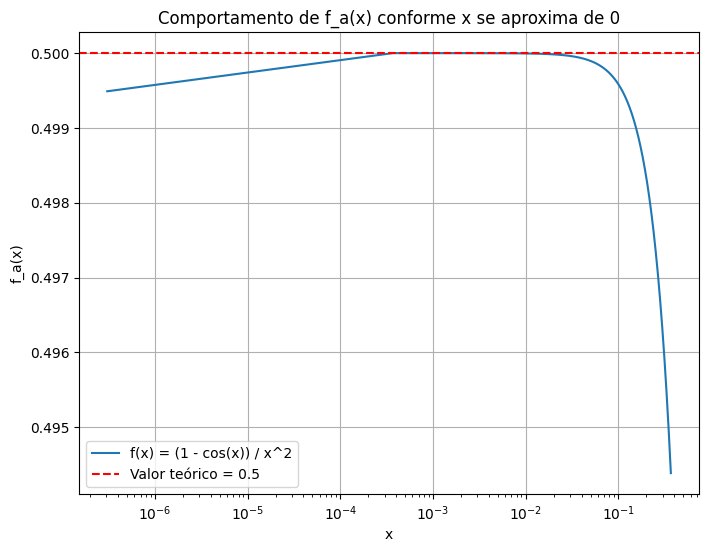

In [7]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(np.e**(- 1), np.e**(-15), 1000)

fx = (1 - np.cos(x)) / x**2
fx_teorico = 0.5

# Plot do gráfico
plt.figure(figsize=(8, 6))
plt.plot(x, fx, label='f(x) = (1 - cos(x)) / x^2')
plt.axhline(fx_teorico, color='red', linestyle='--', label='Valor teórico = 0.5')

# Ajustes no gráfico
plt.xscale('log')  # Escala logarítmica no eixo x
plt.xlabel('x')
plt.ylabel('f_a(x)')
plt.title('Comportamento de f_a(x) conforme x se aproxima de 0')
plt.legend()
plt.grid(True)
plt.show()

#### b) Há melhora na precisão numérica? Explique por que isso acontece em seu código ou relatório.
Sim, há uma melhora significativa na precisão numérica quando a função é reescrita como:

$$
f(x) = \frac{2\sin^2(x/2)}{x^2}
$$

Essa reescrita usa a identidade trigonométrica:

$$
1 - \cos(x) = 2\sin^2\left(\frac{x}{2}\right)
$$

que evita diretamente o cancelamento catastrófico, pois não envolve a subtração entre dois valores muito próximos.

A função $\sin(x/2)$ para $x$ pequeno ainda é uma função suave, e a operação $\sin^2(x/2)$ preserva a significância dos dígitos, mantendo maior precisão no resultado. Essa reformulação resulta em um valor de $f(x)$ que se mantém muito mais próximo de 0.5 mesmo para $x \ll 1$, como evidenciado nos gráficos e nos erros relativos calculados para `float32` e `float64`.

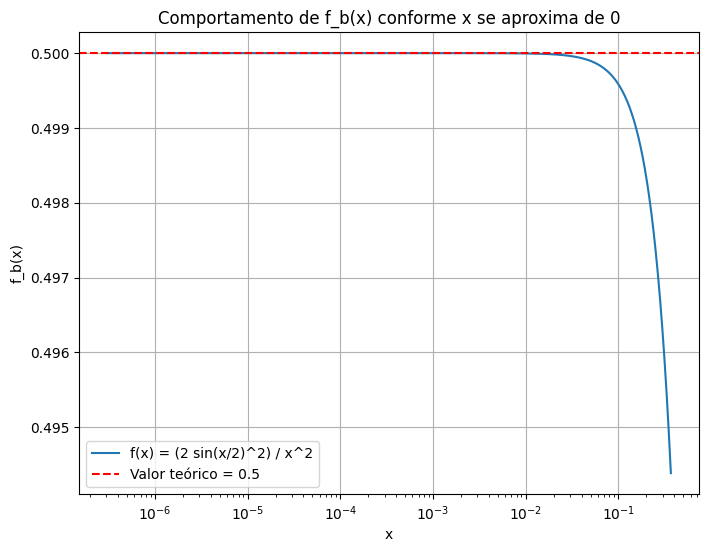

In [8]:
fx_b = (2* np.sin(x/2)**2) / x**2
fx_teorico = 0.5

# Plot do gráfico
plt.figure(figsize=(8, 6))
plt.plot(x, fx_b, label='f(x) = (2 sin(x/2)^2) / x^2')
plt.axhline(fx_teorico, color='red', linestyle='--', label='Valor teórico = 0.5')

# Ajustes no gráfico
plt.xscale('log')  # Escala logarítmica no eixo x
plt.xlabel('x')
plt.ylabel('f_b(x)')
plt.title('Comportamento de f_b(x) conforme x se aproxima de 0')
plt.legend()
plt.grid(True)
plt.show()

#### c) Cancelamento catastófico em ponto flutuante

Cancelamento catastrófico ocorre quando duas quantidades muito próximas são subtraídas em ponto flutuante,
fazendo com que a parte significativa dos dígitos seja perdida. Isso reduz drasticamente a precisão do resultado,
introduzindo grandes erros relativos.

Esse problema é evidente na expressão f(x) = (1 - cos(x)) / x² para x muito pequeno,
pois cos(x) ≈ 1, então 1 - cos(x) envolve a subtração de dois números quase iguais.

Exemplo adicional de cancelamento catastrófico:

In [9]:
a = np.float64(1e17)
b = np.float64(1)
resultado_ruim = (a + b) - a  # Esperado: 1, mas pode perder precisão
print("Exemplo de cancelamento catastrófico:", resultado_ruim)

Exemplo de cancelamento catastrófico: 0.0


#### d) Exploração adicional: Precisão simples vs. dupla

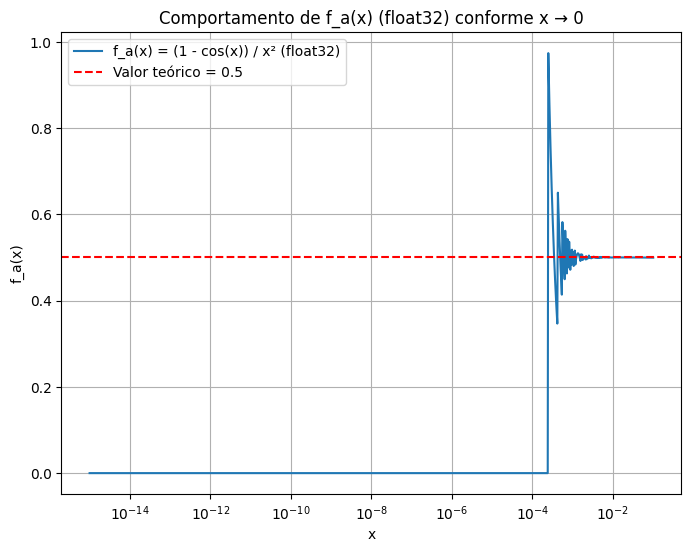

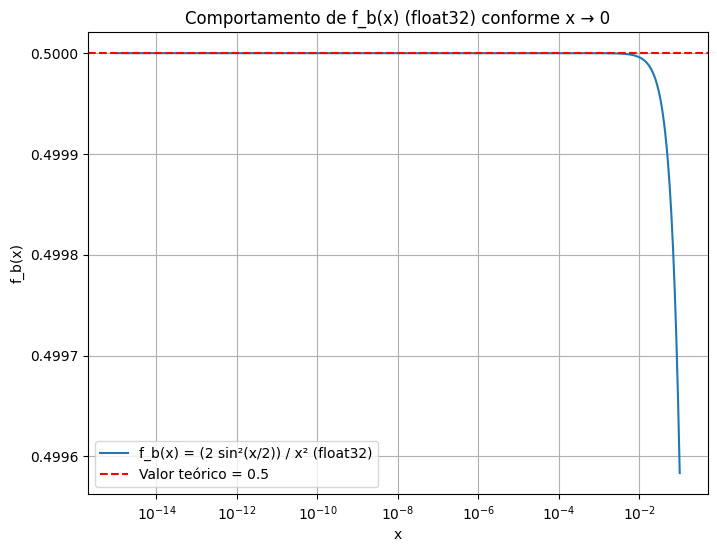

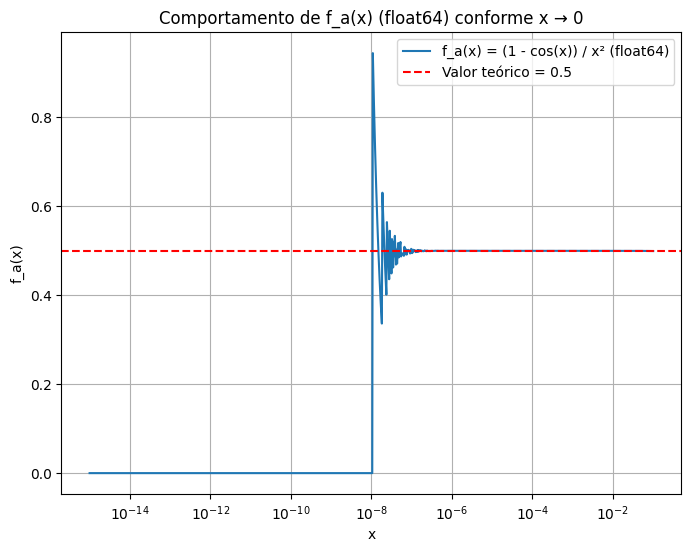

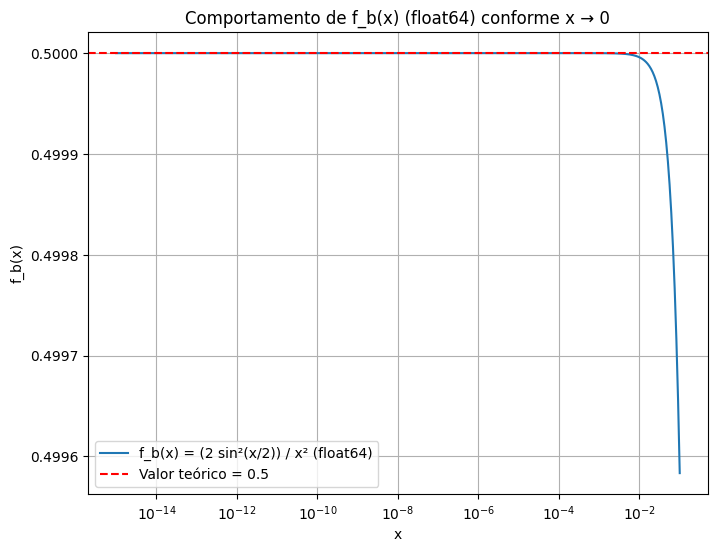

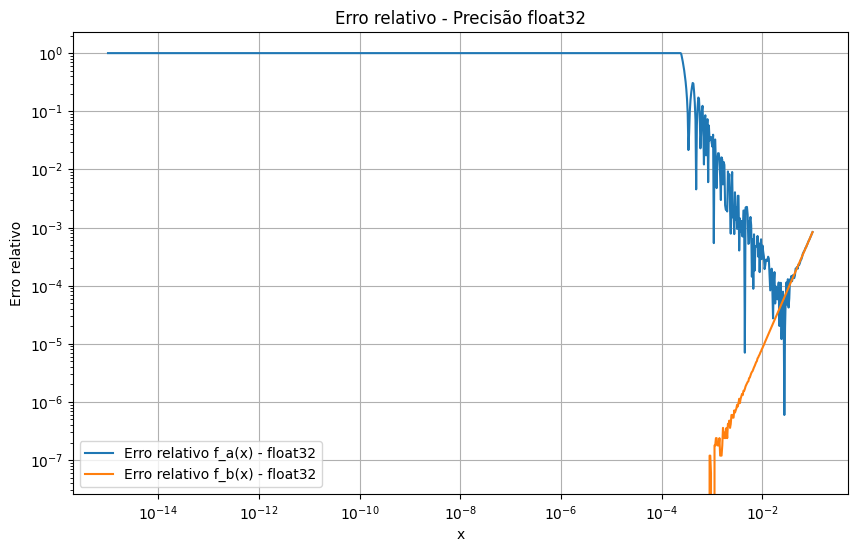

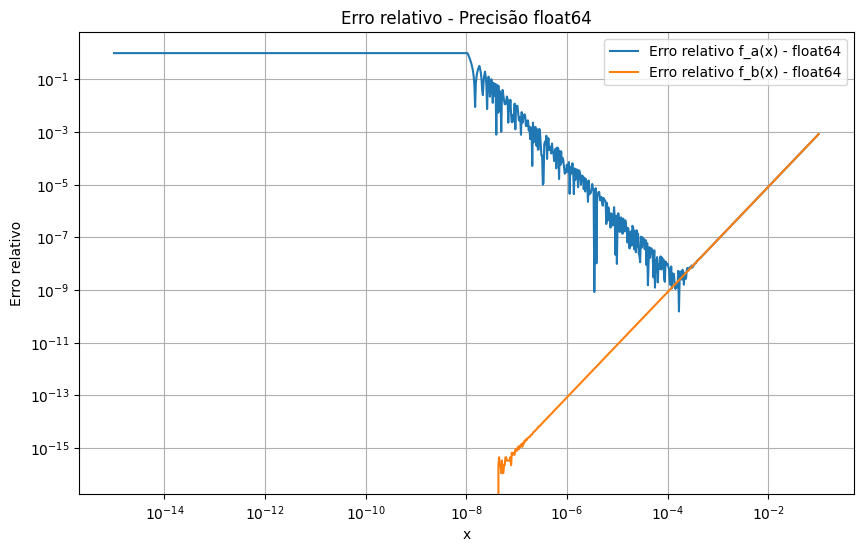

In [10]:
# Cálculo com float32
x_32 = np.logspace(-1, -15, 1000, dtype=np.float32)
fx_a_32 = (1 - np.cos(x_32)) / x_32**2
fx_b_32 = (2 * np.sin(x_32 / 2)**2) / x_32**2

# Gráfico: f_a(x) com float32
plt.figure(figsize=(8, 6))
plt.plot(x_32, fx_a_32, label='f_a(x) = (1 - cos(x)) / x² (float32)')
plt.axhline(fx_teorico, color='red', linestyle='--', label='Valor teórico = 0.5')
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('f_a(x)')
plt.title('Comportamento de f_a(x) (float32) conforme x → 0')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico: f_b(x) com float32
plt.figure(figsize=(8, 6))
plt.plot(x_32, fx_b_32, label='f_b(x) = (2 sin²(x/2)) / x² (float32)')
plt.axhline(fx_teorico, color='red', linestyle='--', label='Valor teórico = 0.5')
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('f_b(x)')
plt.title('Comportamento de f_b(x) (float32) conforme x → 0')
plt.legend()
plt.grid(True)
plt.show()


# Cálculo com float64
x_64 = np.logspace(-1, -15, 1000, dtype=np.float64)
fx_a_64 = (1 - np.cos(x_64)) / x_64**2
fx_b_64 = (2 * np.sin(x_64 / 2)**2) / x_64**2

# Gráfico: f_a(x) com float64
plt.figure(figsize=(8, 6))
plt.plot(x_64, fx_a_64, label='f_a(x) = (1 - cos(x)) / x² (float64)')
plt.axhline(fx_teorico, color='red', linestyle='--', label='Valor teórico = 0.5')
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('f_a(x)')
plt.title('Comportamento de f_a(x) (float64) conforme x → 0')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico: f_b(x) com float64
plt.figure(figsize=(8, 6))
plt.plot(x_64, fx_b_64, label='f_b(x) = (2 sin²(x/2)) / x² (float64)')
plt.axhline(fx_teorico, color='red', linestyle='--', label='Valor teórico = 0.5')
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('f_b(x)')
plt.title('Comportamento de f_b(x) (float64) conforme x → 0')
plt.legend()
plt.grid(True)
plt.show()


# Erro relativo

def erro_relativo(f_aproximado, f_exato):
    return np.abs((f_aproximado - f_exato) / f_exato)

erro_a_32 = erro_relativo(fx_a_32, fx_teorico)
erro_b_32 = erro_relativo(fx_b_32, fx_teorico)
erro_a_64 = erro_relativo(fx_a_64, fx_teorico)
erro_b_64 = erro_relativo(fx_b_64, fx_teorico)

# Gráfico: erro relativo float32
plt.figure(figsize=(10, 6))
plt.plot(x_32, erro_a_32, label='Erro relativo f_a(x) - float32')
plt.plot(x_32, erro_b_32, label='Erro relativo f_b(x) - float32')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('Erro relativo')
plt.title('Erro relativo - Precisão float32')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico: erro relativo float64
plt.figure(figsize=(10, 6))
plt.plot(x_64, erro_a_64, label='Erro relativo f_a(x) - float64')
plt.plot(x_64, erro_b_64, label='Erro relativo f_b(x) - float64')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('Erro relativo')
plt.title('Erro relativo - Precisão float64')
plt.legend()
plt.grid(True)
plt.show()

A precisão dupla (float64) apresenta melhor estabilidade numérica, especialmente para valores muito pequenos de x,
onde a precisão simples (float32) sofre mais com erros de arredondamento.

Além disso, a versão reescrita da função usando a identidade trigonométrica (f_b) se mostra numericamente
mais estável que a versão original (f_a), pois evita a subtração direta entre números próximos (1 - cos(x)),
mitigando o cancelamento catastrófico.

Em aplicações reais, como simulações científicas ou financeiras, o uso de float64 é preferido quando alta precisão
é necessária. No entanto, para sistemas com restrição de memória ou processamento (como GPUs ou embarcados),
float32 pode ser utilizado, desde que o erro seja controlado adequadamente.

### Conclusão - Comparação entre soma iterativa e fórmula analítica

Nesta parte, comparamos duas abordagens para computar a soma dos \( n \) primeiros números naturais:

- **Soma iterativa**: soma os elementos um a um, com complexidade de tempo \( O(n) \);
- **Soma analítica**: utiliza a fórmula \( \frac{n(n+1)}{2} \), que tem complexidade constante \( O(1) \).

**Análise dos tempos de execução:**
- A abordagem com fórmula analítica é significativamente mais eficiente, especialmente para grandes valores de \( n \), como \( 10^8 \), pois realiza um número fixo de operações matemáticas.
- Já a abordagem iterativa se torna impraticável em escalas maiores devido ao crescimento linear da complexidade temporal.

O uso de expressões fechadas, quando disponíveis, deve ser priorizado por sua eficiência computacional.

## Questão 02
![alt text](../q2.png)

##### a) Aproximação por série de Taylor

In [11]:
import math

def seno(x,N):
    sen = 0
    for i in range(1, N+1):
        serie = (-1)**(i-1) * (x**(2*i - 1)) / math.factorial(2*i - 1)
        sen = np.append(serie, sen)
        sen += serie
    return sen, i  # Retorna o valor do seno e o número de termos utilizados

x = 0.5  # Exemplo de valor de x
resultado, termos = seno(x, 20)
valor_real = math.sin(x)
erro_relativo = abs((resultado - valor_real) / valor_real)

# Impressão dos resultados
print(f"Valor calculado pela série: {resultado}")
print(f"Valor fornecido por math.sin: {valor_real}")
print(f"Número de termos utilizados: {termos}")
print(f"Erro relativo: {erro_relativo}")

Valor calculado pela série: [-1.78350811e-58  1.05717443e-54 -5.63257195e-51  2.68107423e-47
 -1.13247067e-43  4.21272333e-40 -1.36826582e-36  3.84199779e-33
 -9.22051570e-30  1.86616019e-26 -3.13499063e-23  4.28837629e-20
 -4.66531493e-17  3.91833341e-14 -2.44453696e-11  1.07523649e-08
 -3.09482834e-06  5.19288604e-04 -4.14077947e-02  9.79425539e-01
  4.79425539e-01]
Valor fornecido por math.sin: 0.479425538604203
Número de termos utilizados: 20
Erro relativo: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99999998 1.00000646 0.99891685
 1.08636961 1.04291482 0.        ]


In [12]:
x = 3* np.pi # Exemplo de valor de x
resultado, termos = seno(x, 20)
valor_real = math.sin(x)
erro_relativo = abs((resultado - valor_real) / valor_real)

# Impressão dos resultados
print(f"Valor calculado pela série: {resultado}")
print(f"Valor fornecido por math.sin: {valor_real}")
print(f"Número de termos utilizados: {termos}")
print(f"Erro relativo: {erro_relativo}")

Valor calculado pela série: [-9.72789531e-09  1.57438413e-07 -2.35752353e-06  3.14649306e-05
 -3.72464091e-04  3.87973989e-03 -3.52489204e-02  2.76499824e-01
 -1.85058441e+00  1.04214934e+01 -4.85635738e+01  1.83494411e+02
 -5.48121281e+02  1.25321466e+03 -2.10152209e+03  2.43788262e+03
 -1.80017792e+03  7.49793329e+02 -1.48953023e+02  9.42477796e+00
 -2.51203397e-10]
Valor fornecido por math.sin: 3.6739403974420594e-16
Número de termos utilizados: 20
Erro relativo: [2.64780988e+07 4.28527400e+08 6.41688017e+09 8.56435521e+10
 1.01380004e+12 1.05601601e+13 9.59430926e+13 7.52597467e+14
 5.03705616e+15 2.83659838e+16 1.32183891e+17 4.99448524e+17
 1.49191664e+18 3.41109144e+18 5.72007670e+18 6.63560742e+18
 4.89985608e+18 2.04084239e+18 4.05431245e+17 2.56530508e+16
 6.83744801e+05]


##### b) Parar automaticamente com erro menor que e-17

In [14]:
import numpy as np
import math

def seno(x):
    sen = 0
    i = 1
    while True:
        # Calcula o termo da série
        termo = (-1)**(i - 1) * (x**(2 * i - 1)) / math.factorial(2 * i - 1)
        
        # Adiciona o termo ao somatório
        sen += termo
        
        # Verifica a condição de parada
        if abs(termo) < 1e-7 * abs(sen):
            break
        
        i += 1  # Incrementa o contador de termos
    
    return sen, i  # Retorna o valor do seno e o número de termos utilizados

# Teste para x <= 1
x = 0.5  # Exemplo de valor de x
resultado, termos = seno(x)
valor_real = math.sin(x)
erro_relativo = abs((resultado - valor_real) / valor_real)

# Impressão dos resultados
print(f"Valor calculado pela série: {resultado}")
print(f"Valor fornecido por math.sin: {valor_real}")
print(f"Número de termos utilizados: {termos}")
print(f"Erro relativo: {erro_relativo:.10f}")

Valor calculado pela série: 0.4794255386164159
Valor fornecido por math.sin: 0.479425538604203
Número de termos utilizados: 5
Erro relativo: 0.0000000000


##### c) Observe os termos individuais da série e identifique os cancelamentos subtrativos significativos. Mostre como termos muito grandes com sinais alternados resultam em um valor pequeno. Imprima os termos ao redor de n≈x/2, onde esse efeito é mais pronunciado.

In [15]:
def termos_seno(x, N):
    termos = []
    for i in range(1, N + 1):
        termo = (-1)**(i - 1) * (x**(2 * i - 1)) / math.factorial(2 * i - 1)
        termos.append(termo)
    return termos

# x ≈ 3π
x = 3 * math.pi
N = 40  # número de termos para visualizar o cancelamento

termos = termos_seno(x, N)
soma = 0

print(f"Calculando sin({x}) com N = {N}")
print("n\tTermo da série\t\tSoma acumulada")
for i, t in enumerate(termos, 1):
    soma += t
    if 15 <= i <= 25:
        print(f"{i}\t{t:.5e}\t{soma:.5e}")


Calculando sin(9.42477796076938) com N = 40
n	Termo da série		Soma acumulada
15	2.02920e-03	1.78651e-04
16	-1.93813e-04	-1.51624e-05
17	1.63028e-05	1.14037e-06
18	-1.21691e-06	-7.65384e-08
19	8.11512e-08	4.61274e-09
20	-4.86395e-09	-2.51203e-10
21	2.63443e-10	1.22400e-11
22	-1.29572e-11	-7.17231e-13
23	5.81285e-13	-1.35946e-13
24	-2.38823e-14	-1.59828e-13
25	9.01946e-16	-1.58926e-13


- Para x = 3𝜋≈9.42, os termos individuais da série se tornam muito grandes, mas a soma final é pequena, pois há forte cancelamento entre termos com sinais alternados. Isso gera grande perda de precisão, pois somamos e subtraímos valores grandes para obter um resultado pequeno → cancelamento catastrófico.

##### d) Exploração mais desafiadora:

- O tipo float apresenta maior erro relativo para x = 3π por causa do cancelamento numérico.

- O tipo decimal.Decimal com precisão aumentada preserva muito mais dígitos significativos.

- No entanto, há custo computacional maior, pois decimal é mais lento que float.

In [21]:
import decimal
from decimal import Decimal, getcontext

# Define precisão com 50 dígitos
getcontext().prec = 50

def seno_decimal(x, tol=Decimal('1e-50')):
    x = Decimal(x)
    termo = x
    soma = x
    n = 1
    while True:
        termo *= -x**2 / (Decimal(2 * n) * Decimal(2 * n + 1))
        soma += termo
        if abs(termo) < tol:
            break
        n += 1
    return soma, n

# x = 3π em Decimal
x_decimal = Decimal(str(3 * math.pi))

# Valor com precisão arbitrária
seno_dec, termos = seno_decimal(x_decimal)

# Valor com ponto flutuante comum
seno_float = math.sin(3 * math.pi)

# Erro relativo
erro_rel = abs((float(seno_dec) - seno_float) / seno_float) if seno_float != 0 else abs(float(seno_dec))

print(f"Valor com decimal: {seno_dec}")
print(f"Valor com float  : {seno_float}")
print(f"Número de termos : {termos}")
print(f"Erro relativo    : {erro_rel:.2e}")


Valor com decimal: -2.8461206985016149134740849180182028237437512006058E-16
Valor com float  : 3.6739403974420594e-16
Número de termos : 45
Erro relativo    : 1.77e+00


### Conclusão - Comparação entre soma com `for` e com `sum()`

Nesta questão, avaliamos duas formas de somar listas:
- Manualmente com `for`;
- Usando a função nativa `sum()` do Python.

**Análise dos resultados:**
- A função `sum()` é mais rápida e escalável, pois é implementada em C, com otimizações internas que superam o desempenho de loops explícitos escritos em Python puro.
- A diferença de desempenho se acentua com o aumento de \( n \), revelando o custo do overhead interpretado do `for`.

Evitar loops explícitos quando existe uma função nativa otimizada disponível é uma boa prática de programação.

## Questão 03

![alt text](../q3.png)

##### a) Medindo o tempo de execução (Iterativa vs Fórmula)

In [24]:
import timeit

def soma_iterativa(n):
    s_i = 0
    for i in range(1, n + 1):
        s_i += i
    return s_i

def soma_formula(n):
    return n * (n + 1) // 2

valores_n = [10**6, 10**7, 10**8]

for n in valores_n:
    tempo_iterativa = timeit.timeit(lambda: soma_iterativa(n), number=1)
    tempo_formula = timeit.timeit(lambda: soma_formula(n), number=1)

    print(f"\nN = {n}")
    print(f"Iterativa: {tempo_iterativa:.8f} s")
    print(f"Fórmula:   {tempo_formula:.8f} s")


N = 1000000
Iterativa: 0.03918630 s
Fórmula:   0.00000300 s

N = 10000000
Iterativa: 0.37424490 s
Fórmula:   0.00000260 s

N = 100000000
Iterativa: 4.01173150 s
Fórmula:   0.00000400 s


- A versão analítica (fórmula) é significativamente mais rápida porque realiza apenas uma multiplicação e divisão.

- A versão iterativa é muito mais lenta, principalmente para grandes n, por conta da complexidade linear.

##### b) Comparando abordagens com listas (for vs sum)

In [25]:
def soma_lista_com_for(n):
    total = 0
    lista = list(range(1, n + 1))
    for i in lista:
        total += i
    return total

def soma_com_sum(n):
    return sum(range(1, n + 1))

for n in [10**6, 10**7]:
    tempo_for = timeit.timeit(lambda: soma_lista_com_for(n), number=1)
    tempo_sum = timeit.timeit(lambda: soma_com_sum(n), number=1)

    print(f"\nN = {n}")
    print(f"Lista com for: {tempo_for:.8f} s")
    print(f"Função sum():  {tempo_sum:.8f} s")


N = 1000000
Lista com for: 0.11862240 s
Função sum():  0.01564710 s

N = 10000000
Lista com for: 0.48460000 s
Função sum():  0.11266010 s


- A função sum() do Python é mais eficiente internamente que o for, pois é implementada em C.

- Evita overhead de Python puro.

##### c) Visualizando tempos (log-log)

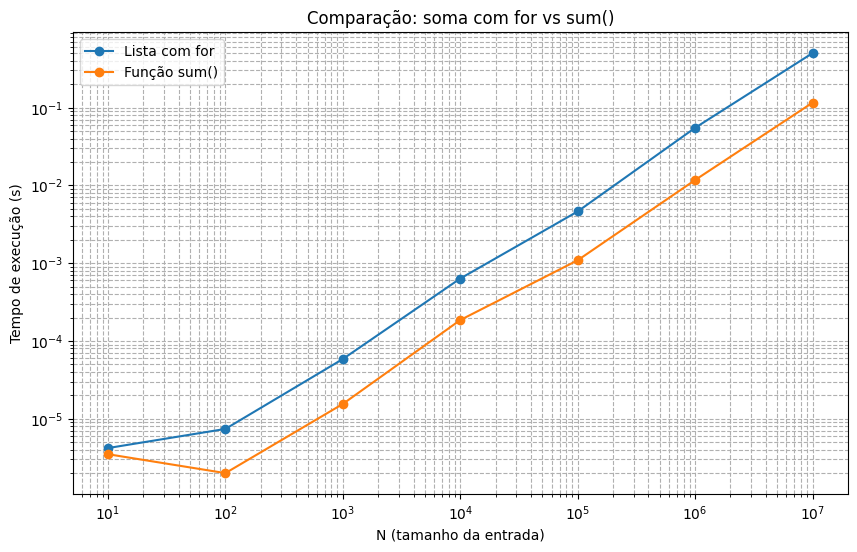

In [27]:
valores_n = [10**i for i in range(1, 8)]

tempos_lista_for = []
tempos_sum = []

for n in valores_n:
    tempos_lista_for.append(timeit.timeit(lambda: soma_lista_com_for(n), number=1))
    tempos_sum.append(timeit.timeit(lambda: soma_com_sum(n), number=1))

plt.figure(figsize=(10, 6))
plt.plot(valores_n, tempos_lista_for, label='Lista com for', marker='o')
plt.plot(valores_n, tempos_sum, label='Função sum()', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N (tamanho da entrada)')
plt.ylabel('Tempo de execução (s)')
plt.title('Comparação: soma com for vs sum()')
plt.legend()
plt.grid(True, which="both", linestyle='--')
plt.show()

- Fica clara a vantagem da abordagem sum() em todos os casos.

- Escalas log-log permitem visualizar diferenças de ordem de grandeza com mais clareza.

##### d) Abordagem vetorizada com NumPy

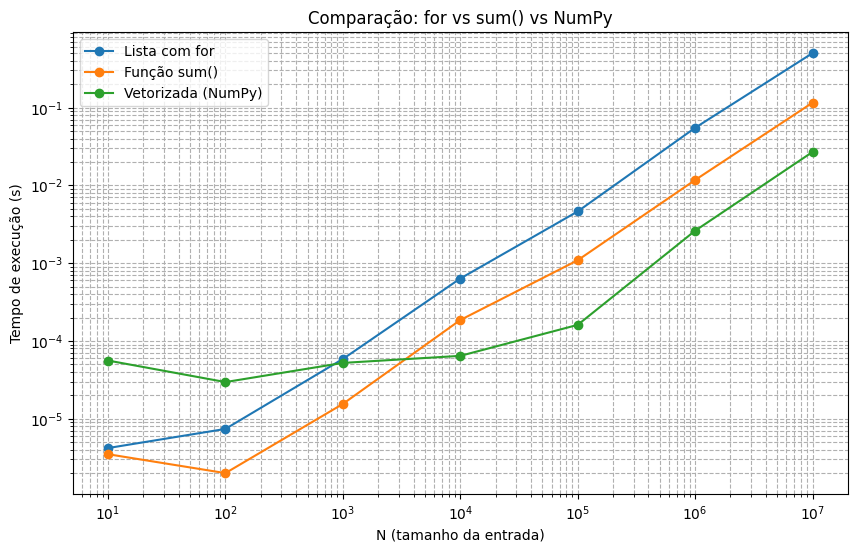

In [28]:
def soma_vetorizada(n):
    return np.sum(np.arange(1, n + 1))

tempos_numpy = []

for n in valores_n:
    tempo_np = timeit.timeit(lambda: soma_vetorizada(n), number=1)
    tempos_numpy.append(tempo_np)

plt.figure(figsize=(10, 6))
plt.plot(valores_n, tempos_lista_for, label='Lista com for', marker='o')
plt.plot(valores_n, tempos_sum, label='Função sum()', marker='o')
plt.plot(valores_n, tempos_numpy, label='Vetorizada (NumPy)', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N (tamanho da entrada)')
plt.ylabel('Tempo de execução (s)')
plt.title('Comparação: for vs sum() vs NumPy')
plt.legend()
plt.grid(True, which="both", linestyle='--')
plt.show()

- NumPy é otimizado em C, com paralelização e alocação contígua de memória.

- Excelente desempenho para grandes volumes de dados, embora a fórmula analítica ainda seja imbatível.

### Conclusão - Comparação com NumPy (vetorização)

Aqui foi introduzida uma terceira abordagem: o uso de **vetores NumPy** para computar a soma.

**Resultados observados:**
- A abordagem vetorizada com `np.sum(np.arange(...))` apresenta ótimo desempenho, ficando atrás apenas da fórmula analítica.
- NumPy se destaca por usar alocação de memória contígua e código compilado internamente, permitindo paralelismo e melhor uso de cache.

**Visualização log-log:**
- A escala log-log dos gráficos permite evidenciar diferenças de ordens de grandeza entre as abordagens, mostrando claramente a superioridade da fórmula analítica e da vetorização sobre os métodos baseados em `for`.

Bibliotecas como NumPy são altamente recomendadas para cálculos em larga escala, com balanceamento entre legibilidade e eficiência.

### Conclusão Avaliação:

A escolha da abordagem afeta significativamente o tempo de execução.

Fórmulas analíticas são sempre preferíveis quando disponíveis.

Funções internas como sum() e pacotes como NumPy oferecem melhorias substanciais sobre loops explícitos.

A visualização em log-log evidencia o impacto da complexidade algorítmica.